In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json 
import numpy as np
import plotly.express as px
import plotly
import seaborn as sns

In [2]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/Obesity_in_the_United_States')
df_obesity=dfs[0]
df_obesity


,"States, district, & territories",Obesity rank,Obese adults (mid-2000s),Obese adults (2020)[79][74][80],Overweight (incl. obese) adults(mid-2000s),Obese children and adolescents(mid-2000s)[81]
0,Alabama,5,30.1%,36.3%,65.4%,16.7%
1,Alaska,9,27.3%,34.2%,64.5%,11.1%
2,American Samoa,—,—,75%[78],95%[82],35%[78][83]
3,Arizona,30,23.3%,29.5%,59.5%,12.2%
4,Arkansas,7,28.1%,35.0%,64.7%,16.4%
5,California,48,23.1%,25.1%,59.4%,13.2%
6,Colorado,51,21.0%,22.6%,55.0%,9.9%
7,Connecticut,42,20.8%,26.9%,58.7%,12.3%
8,Delaware,23,25.9%,31.8%,63.9%,22.8%
9,District of Columbia,50,22.1%,23.0%,55.0%,14.8%


In [3]:
#df_pop2.drop('index',axis=1, inplace=True)
df_obesity.drop(['Obesity rank','Obese adults (mid-2000s)','Overweight (incl. obese) adults(mid-2000s)','Obese children and adolescents(mid-2000s)[81]'],axis=1, inplace=True)

In [4]:
# df_obesity['Obese adults 2020'].apply(lambda percent: float(percent[0:4]))
df_obesity

,"States, district, & territories",Obese adults (2020)[79][74][80]
0,Alabama,36.3%
1,Alaska,34.2%
2,American Samoa,75%[78]
3,Arizona,29.5%
4,Arkansas,35.0%
5,California,25.1%
6,Colorado,22.6%
7,Connecticut,26.9%
8,Delaware,31.8%
9,District of Columbia,23.0%


In [5]:
#
df_obesity['Obese adults (2020)[79][74][80]']=df_obesity['Obese adults (2020)[79][74][80]'].apply(lambda percent: 0 if percent == '—' else percent)
df_obesity

,"States, district, & territories",Obese adults (2020)[79][74][80]
0,Alabama,36.3%
1,Alaska,34.2%
2,American Samoa,75%[78]
3,Arizona,29.5%
4,Arkansas,35.0%
5,California,25.1%
6,Colorado,22.6%
7,Connecticut,26.9%
8,Delaware,31.8%
9,District of Columbia,23.0%


In [6]:
#Changing the names of the columns to 
df_obesity=df_obesity.rename(columns={'States, district, & territories':'States','Obese adults (2020)[79][74][80]':'Obese Adults in Percentage (2020)'})
df_obesity


,States,Obese Adults in Percentage (2020)
0,Alabama,36.3%
1,Alaska,34.2%
2,American Samoa,75%[78]
3,Arizona,29.5%
4,Arkansas,35.0%
5,California,25.1%
6,Colorado,22.6%
7,Connecticut,26.9%
8,Delaware,31.8%
9,District of Columbia,23.0%


In [7]:
df_obesity.shape

(56, 2)

In [8]:
#https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/
df_obesity.dtypes

States                               object
Obese Adults in Percentage (2020)    object
dtype: object

In [9]:
df_obesity.iat[2,1]='75.0%'

In [10]:
df_obesity

,States,Obese Adults in Percentage (2020)
0,Alabama,36.3%
1,Alaska,34.2%
2,American Samoa,75.0%
3,Arizona,29.5%
4,Arkansas,35.0%
5,California,25.1%
6,Colorado,22.6%
7,Connecticut,26.9%
8,Delaware,31.8%
9,District of Columbia,23.0%


In [16]:
#Remove all of  % from values under the Obese Adults in Percentage column
#https://pbpython.com/currency-cleanup.html 
df_obesity['Obese Adults in Percentage (2020)'] = df_obesity['Obese Adults in Percentage (2020)'].str.replace('%', '')
df_obesity

,States,Obese Adults in Percentage (2020)
0,Alabama,36.3
1,Alaska,34.2
2,American Samoa,75.0
3,Arizona,29.5
4,Arkansas,35.0
5,California,25.1
6,Colorado,22.6
7,Connecticut,26.9
8,Delaware,31.8
9,District of Columbia,23.0


In [18]:
df_obesity.dtypes

States                               object
Obese Adults in Percentage (2020)    object
dtype: object

In [19]:
#Changes the values from the Obese Adults in Percentage (2020) column from objects to a float
df_obesity['Obese Adults in Percentage (2020)']=df_obesity['Obese Adults in Percentage (2020)'].astype(float)

In [20]:
df_obesity.dtypes

States                                object
Obese Adults in Percentage (2020)    float64
dtype: object

ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values


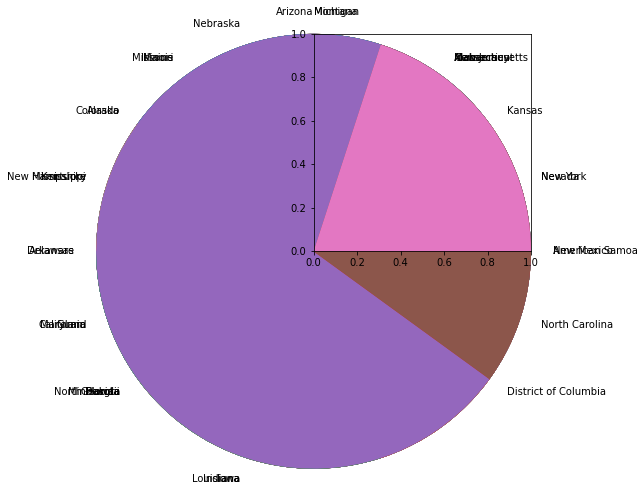

In [34]:
#https://www.w3schools.com/python/matplotlib_pie_charts.asp

values=df_obesity['Obese Adults in Percentage (2020)']
state_labels=df_obesity['States']

plt.pie(values, labels=state_labels)
df_obesity.set_size_inches(50,50)
plt.legend()
plt.show()